In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_dist=data['Churn'].value_counts(normalize=True)
print(churn_dist)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


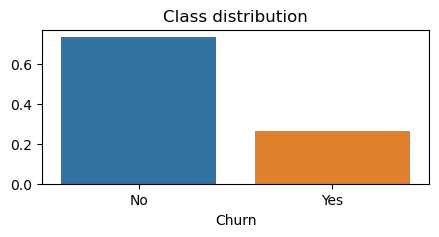

In [6]:
plt.figure(figsize=(5,2))
sns.barplot(x=churn_dist.index,y=churn_dist.values)
plt.title("Class distribution")
plt.show()

In [9]:
service_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies']

for col in service_columns:
    print(data[col].unique())
    print(data[col].value_counts())

['No phone service' 'No' 'Yes']
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
['No' 'Yes' 'No internet service']
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
['Yes' 'No' 'No internet service']
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
['No' 'Yes' 'No internet service']
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
['No' 'Yes' 'No internet service']
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
['No' 'Yes' 'No internet service']
StreamingTV
No                     2810
Yes         

In [17]:
def preprocessed_data(data):
    data_preprocessed=data.copy() 

    data_preprocessed['MultipleLines']=data_preprocessed['MultipleLines'].replace({'No phone service':'No'})

    internet_dependent_columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                'StreamingMovies']

    for col in internet_dependent_columns:
        data_preprocessed[col]=data_preprocessed[col].replace({'No internet service': 'No'})

    data_preprocessed['HasPhoneService']=(data_preprocessed['PhoneService']=='Yes').astype(int)
    data_preprocessed['HasInternetService']=(data_preprocessed['InternetService']=='Yes').astype(int)

    return data_preprocessed

In [18]:
data_preprocessed=preprocessed_data(data)

In [19]:
for col in service_columns:
    print(f"\n{col}:",data_preprocessed[col].unique())


MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['No' 'Yes']

StreamingTV: ['No' 'Yes']

StreamingMovies: ['No' 'Yes']


In [20]:
data_preprocessed['TotalServices']=(
    (data_preprocessed[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                        'StreamingTV','StreamingMovies']]=='Yes').sum(axis=1))
data_preprocessed['InternetService']=data_preprocessed['InternetService'].map({'DSL':1,'Fiber Optic':2,'No':0})